# Machine Learning

## Modulos a emplear

In [1]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, scale, StandardScaler
from sklearn.decomposition import PCA
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Funciones importadas como modulos
notebook_dir = os.getcwd()
scripts_dir = os.path.join(notebook_dir, "..", "src")
sys.path.append(scripts_dir)
from data_transform.print_unique_values import print_unique_values

# Codigo para imprimir mas de una salida de la misma celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Carga y selección de la Información

### Seleccionamos la informacion del pozo clave y la editamos

In [2]:
# Definimos la ruta de la informacion procesada
file_processed = "arroyo_procesed.csv"
path_data_processed = os.path.join(notebook_dir, "..", "data", "processed", "arroyo", file_processed)

# Cargamos la información procesada
arroyo_df = pd.read_csv(path_data_processed)

# Mostramos los pozos en el DataFrame
print_unique_values(arroyo_df, "wellname")

Valores únicos en la columna 'wellname': Arroyo Prieto-11, Arroyo Prieto-8


### Seleccionamos el pozo/pozos de interes para entrenar el modelo

In [3]:
# Seleccionamos el pozo/los pozos de interes
key_wells_lst = ["Arroyo Prieto-8"]
# Creamos el DataFrame key_well con la informacion de interes
key_well = arroyo_df[arroyo_df["wellname"].isin(key_wells_lst)].copy()

# Definimos el pozo a predecir
well_target = "Arroyo Prieto-11"

# Definimos las columnas de interes
key_well_tops = ["fs_e1", "fs_e2", "fs_e3", "fs_e4", "fs_e5", "fs_e6", "fs_e7", "fs_e8"]
features = ["por", "pore", "sw", "rhob", "nphi", "vcl"]

## Machine Learning

### Rhobmod

In [4]:
# Definimos el target de interes
target = ["rhobmod"]

# Creamos un DataFrame con la informacion necesario para el modelo de Machine Learning
key_well_df_ml = key_well[features + target + key_well_tops].copy()
key_well_df_ml.dropna(inplace=True)

# Definimos una variable con los features con los que entrenaremos nuestros modelo de ML y con la variable a predecir
X = key_well_df_ml[features + key_well_tops]
y = key_well_df_ml[target]

# Separamos los valores en set de entramiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Convertimos en un array 1D y_train
y_train = y_train.values.ravel()

# Definimos el modelo a emplear
rf_regressor = RandomForestRegressor(bootstrap=True, n_jobs=-1, criterion="poisson", random_state=50)

# Ajustamos nuestro modelo a nuestros datos de entrenamiento
rf_regressor.fit(X_train, y_train)

# Evaluamos nuestro modelo
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rf_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Random forest train/test RMSE: {rf_train: .3f}/{rf_test:.3f}')


RandomForestRegressor(criterion='poisson', n_jobs=-1, random_state=50)

Random forest train/test RMSE:  0.002/0.005


In [5]:
# Creamos el DataFrame predict_well con la informacion del pozo de interes
predict_well = arroyo_df[arroyo_df["wellname"] == well_target].copy()
predict_well = predict_well[["wellname", "md"] + features + key_well_tops]
predict_well.dropna(inplace=True)

# Creamos un DataFrame con la informacion para predecir
predict_well_ml = predict_well[features + key_well_tops].copy()

# Aplicamos el modelo para generar el registro sintetico
y_pred_well_log = rf_regressor.predict(predict_well_ml)

# Creamos la columna del registro sintetico
predict_well[target[0] +"_syn"] = y_pred_well_log

# Guardamos la curva en el dataset del pozo objetivo
qe_df = predict_well.copy()
qe_df[target[0] +"_syn"] = predict_well[target[0] +"_syn"]

### Dtcomod

In [6]:
# Definimos el target de interes
target = ["dtcmod"]

# Creamos un DataFrame con la informacion necesario para el modelo de Machine Learning
key_well_df_ml = key_well[features + target + key_well_tops].copy()
key_well_df_ml.dropna(inplace=True)

# Definimos una variable con los features con los que entrenaremos nuestros modelo de ML y con la variable a predecir
X = key_well_df_ml[features + key_well_tops]
y = key_well_df_ml[target]

# Separamos los valores en set de entramiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Convertimos en un array 1D y_train
y_train = y_train.values.ravel()

# Definimos el modelo a emplear
rf_regressor = RandomForestRegressor(bootstrap=True, n_jobs=-1, criterion="poisson", random_state=50)

# Ajustamos nuestro modelo a nuestros datos de entrenamiento
rf_regressor.fit(X_train, y_train)

# Evaluamos nuestro modelo
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rf_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Random forest train/test RMSE: {rf_train: .3f}/{rf_test:.3f}')

RandomForestRegressor(criterion='poisson', n_jobs=-1, random_state=50)

Random forest train/test RMSE:  0.478/1.442


In [7]:
# Creamos el DataFrame predict_well con la informacion del pozo de interes
predict_well = arroyo_df[arroyo_df["wellname"] == well_target].copy()
predict_well = predict_well[["wellname", "md"] + features + key_well_tops]

predict_well.dropna(inplace=True)

# Creamos un DataFrame con la informacion para predecir
predict_well_ml = predict_well[features + key_well_tops].copy()

# Aplicamos el modelo para generar el registro sintetico
y_pred_well_log = rf_regressor.predict(predict_well_ml)

# Creamos la columna del registro sintetico
predict_well[target[0] +"_syn"] = y_pred_well_log

# Guardamos la curva en el dataset del pozo objetivo
qe_df[target[0] +"_syn"] = predict_well[target[0] +"_syn"]

### Vpmod

In [8]:
# Definimos las columnas de interes
target = ["vpmod"]

# Creamos un DataFrame con la informacion necesario para el modelo de Machine Learning
key_well_df_ml = key_well[features + target + key_well_tops].copy()
key_well_df_ml.dropna(inplace=True)

# Definimos una variable con los features con los que entrenaremos nuestros modelo de ML y con la variable a predecir
X = key_well_df_ml[features + key_well_tops]
y = key_well_df_ml[target]

# Separamos los valores en set de entramiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Convertimos en un array 1D y_train
y_train = y_train.values.ravel()

# Definimos el modelo a emplear
rf_regressor = RandomForestRegressor(bootstrap=True, n_jobs=-1, criterion="poisson", random_state=50)

# Ajustamos nuestro modelo a nuestros datos de entrenamiento
rf_regressor.fit(X_train, y_train)

# Evaluamos nuestro modelo
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rf_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Random forest train/test RMSE: {rf_train: .3f}/{rf_test:.3f}')

RandomForestRegressor(criterion='poisson', n_jobs=-1, random_state=50)

Random forest train/test RMSE:  21.375/65.213


In [9]:
# Creamos el DataFrame predict_well con la informacion del pozo de interes
predict_well = arroyo_df[arroyo_df["wellname"] == well_target].copy()
predict_well = predict_well[["wellname", "md"] + features + key_well_tops]

predict_well.dropna(inplace=True)

# Creamos un DataFrame con la informacion para predecir
predict_well_ml = predict_well[features + key_well_tops].copy()

# Aplicamos el modelo para generar el registro sintetico
y_pred_well_log = rf_regressor.predict(predict_well_ml)

# Creamos la columna del registro sintetico
predict_well[target[0] +"_syn"] = y_pred_well_log

# Guardamos la curva en el dataset del pozo objetivo
qe_df[target[0] +"_syn"] = predict_well[target[0] +"_syn"]

### Vsmod

In [10]:
# Definimos el target de interes
target = ["vsmod"]

# Creamos un DataFrame con la informacion necesario para el modelo de Machine Learning
key_well_df_ml = key_well[features + target + key_well_tops].copy()
key_well_df_ml.dropna(inplace=True)

# Definimos una variable con los features con los que entrenaremos nuestros modelo de ML y con la variable a predecir
X = key_well_df_ml[features + key_well_tops]
y = key_well_df_ml[target]

# Separamos los valores en set de entramiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Convertimos en un array 1D y_train
y_train = y_train.values.ravel()

# Definimos el modelo a emplear
rf_regressor = RandomForestRegressor(bootstrap=True, n_jobs=-1, criterion="poisson", random_state=50)

# Ajustamos nuestro modelo a nuestros datos de entrenamiento
rf_regressor.fit(X_train, y_train)

# Evaluamos nuestro modelo
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

rf_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rf_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Random forest train/test RMSE: {rf_train: .3f}/{rf_test:.3f}')

RandomForestRegressor(criterion='poisson', n_jobs=-1, random_state=50)

Random forest train/test RMSE:  19.740/62.064


In [11]:
# Creamos el DataFrame predict_well con la informacion del pozo de interes
predict_well = arroyo_df[arroyo_df["wellname"] == well_target].copy()
predict_well = predict_well[["wellname", "md"] + features + key_well_tops]
predict_well.dropna(inplace=True)

# Creamos un DataFrame con la informacion para predecir
predict_well_ml = predict_well[features + key_well_tops].copy()

# Aplicamos el modelo para generar el registro sintetico
y_pred_well_log = rf_regressor.predict(predict_well_ml)

# Creamos la columna del registro sintetico
predict_well[target[0] +"_syn"] = y_pred_well_log

# Guardamos la curva en el dataset del pozo objetivo
qe_df[target[0] +"_syn"] = predict_well[target[0] +"_syn"]

In [12]:
qe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3759 entries, 0 to 3758
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wellname     3759 non-null   object 
 1   md           3759 non-null   float64
 2   por          3759 non-null   float64
 3   pore         3759 non-null   float64
 4   sw           3759 non-null   float64
 5   rhob         3759 non-null   float64
 6   nphi         3759 non-null   float64
 7   vcl          3759 non-null   float64
 8   fs_e1        3759 non-null   bool   
 9   fs_e2        3759 non-null   bool   
 10  fs_e3        3759 non-null   bool   
 11  fs_e4        3759 non-null   bool   
 12  fs_e5        3759 non-null   bool   
 13  fs_e6        3759 non-null   bool   
 14  fs_e7        3759 non-null   bool   
 15  fs_e8        3759 non-null   bool   
 16  rhobmod_syn  3759 non-null   float64
 17  dtcmod_syn   3759 non-null   float64
 18  vpmod_syn    3759 non-null   float64
 19  vsmod_syn  

### Corregimos la curva rhob_mod

In [13]:
# Ajuste de la curva RHOB_MOD a los valores reales de densidad (RHOB) utilizando mínimos cuadrados
A = np.vstack([qe_df.rhobmod_syn, np.ones(len(qe_df.rhobmod_syn))]).T
m, c = np.linalg.lstsq(A, qe_df.rhob, rcond=None)[0]

# Corrección de la curva RHOB_MOD utilizando la regresión lineal encontrada
qe_df["rhob_mod_corregida"] = m * qe_df.rhobmod_syn + c

# Imprimir los coeficientes de la regresión lineal
print(f"Coeficiente m: {m}, Coeficiente c: {c}")

# Imprimir los valores corregidos de la curva RHOB_MOD
print("RHOB_MOD corregida:", qe_df["rhob_mod_corregida"])

Coeficiente m: 0.9904885468478088, Coeficiente c: 0.09206512960835056
RHOB_MOD corregida: 0       2.322201
1       2.325391
2       2.337875
3       2.414830
4       2.473807
          ...   
3754    2.498965
3755    2.533026
3756    2.472197
3757    2.470893
3758    2.498440
Name: rhob_mod_corregida, Length: 3759, dtype: float64


In [13]:
# Copiar la columna 'rhobmod' a 'rhob_mod_corregida' para conservar los valores originales
qe_df['rhob_mod_corregida'] = qe_df['rhobmod_syn']

# Calcular el error relativo inicial
qe_df['errrhob'] = 2 * (qe_df['rhobmod_syn'] - qe_df['rhob']) / (qe_df['rhobmod_syn'] + qe_df['rhob'])

# Aplicar la corrección dinámica hasta que se cumplan las condiciones
while np.any(qe_df['errrhob'] > 0.01) or np.any(qe_df['errrhob'] < -0.01):
    # Aplicar la corrección multiplicativa según las condiciones
    qe_df.loc[qe_df['errrhob'] > 0.01, 'rhob_mod_corregida'] *= 0.8
    qe_df.loc[qe_df['errrhob'] < -0.01, 'rhob_mod_corregida'] *= 1.2
    
    # Calcular el nuevo error relativo
    qe_df['errrhob'] = 2 * (qe_df['rhob_mod_corregida'] - qe_df['rhob']) / (qe_df['rhob_mod_corregida'] + qe_df['rhob'])

# Eliminar la columna de error relativo 'errrhob' si no se necesita
qe_df.drop('errrhob', axis=1, inplace=True)

### Graficamos las curvas

Text(0.5, 0, 'Densidad')

Text(0, 0.5, 'Profundidad')

Text(0.5, 0, 'Densidad')

Text(0, 0.5, 'Profundidad')

(4277.45, 2210.55)

(2210.55, 4277.45)

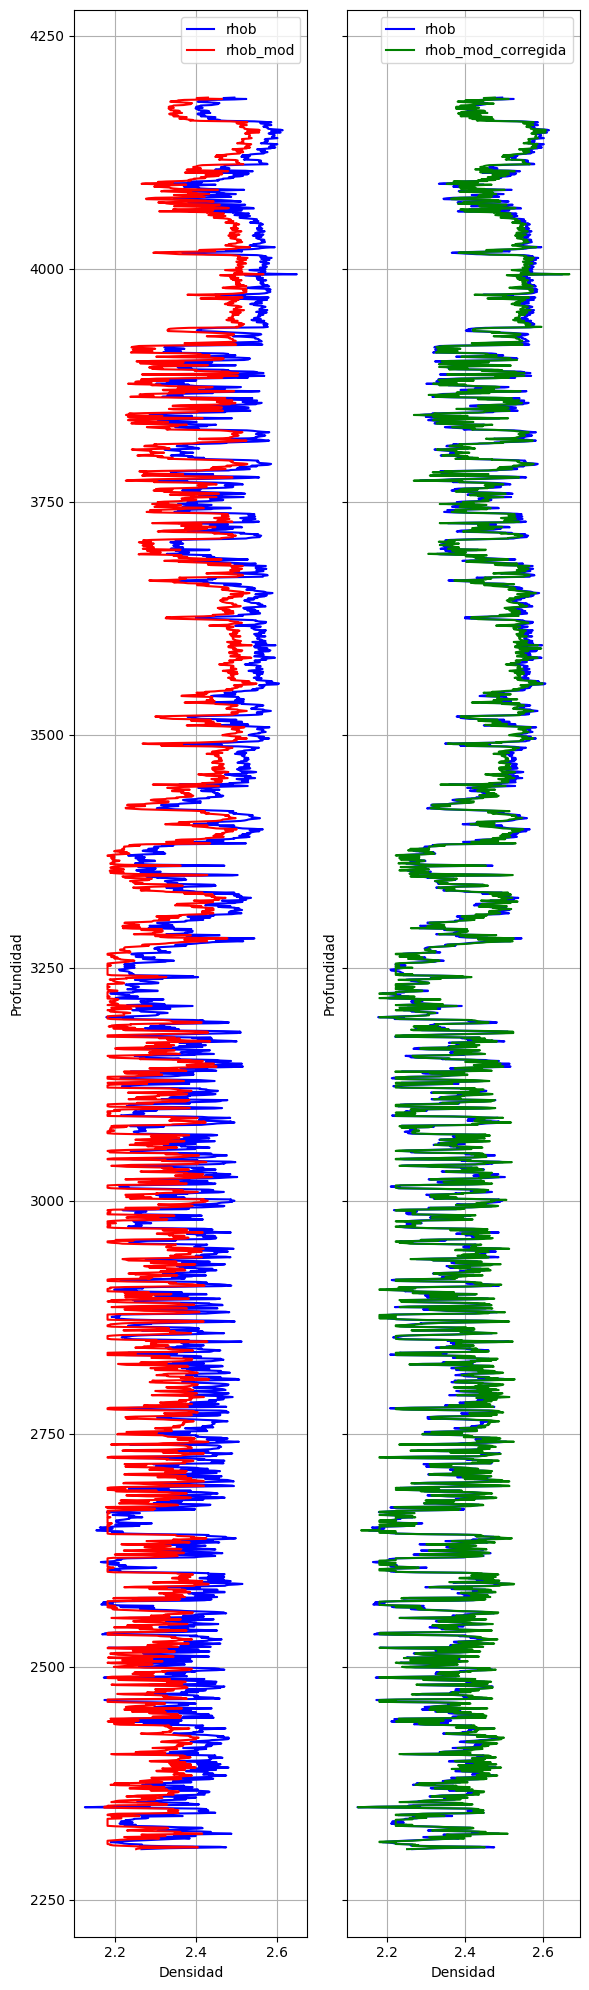

In [14]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 20), sharey=True)  # Dos subplots, comparten eje Y

# Graficar rho_b y rho_b_mod en el primer track
ax1.plot(qe_df.rhob, qe_df.md, label='rhob', color='blue')
ax1.plot(qe_df.rhobmod_syn, qe_df.md, label='rhob_mod', color='red')
ax1.set_xlabel('Densidad')
ax1.set_ylabel('Profundidad')
ax1.grid(True)
ax1.legend()

# Graficar rho_b y rho_b_mod_corregido en el segundo track
ax2.plot(qe_df.rhob, qe_df.md, label='rhob', color='blue')
ax2.plot(qe_df.rhob_mod_corregida, qe_df.md, label='rhob_mod_corregida', color='green')  # Asumiendo que tienes una columna rhobmod_syn_corregida con los valores corregidos
ax2.set_xlabel('Densidad')
ax2.set_ylabel('Profundidad')
ax2.grid(True)
ax2.legend()

# Invertir el eje Y para ambos tracks
ax1.set_ylim(ax1.get_ylim()[::-1])
ax2.set_ylim(ax2.get_ylim()[::-1])

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Guardamos el modelo de Machine Learning

## Creamos el archivo csv

In [16]:
# definimos las unidades para cada columna
units_row = {
    "wellname": " ",
    "md": "m",
    "rhobmod_syn": "g/cm3",
    "rhob_mod_corregida": "g/cm3",
    "dtcmod_syn": "us/ft",
    "vpmod_syn": "m/s",
    "vsmod_syn": "m/s",
}

# Agregamos la fila con las unidades al DataFrame
qe_df = pd.concat([pd.DataFrame([units_row]), qe_df], ignore_index=True)

# Guardamos el registro sintetico en formato csv
synthetic_file_name = f"{well_target}_model_syn.csv"
path_to_save = os.path.join(notebook_dir, "..", "data", "processed", "arroyo", synthetic_file_name)
qe_df[["wellname", "md", "rhobmod_syn", "rhob_mod_corregida", "dtcmod_syn","vpmod_syn", "vsmod_syn"]].to_csv(path_to_save, index=False)